<a href="https://colab.research.google.com/github/Megh-Zyke/MNIST-dataset/blob/main/MNIST_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

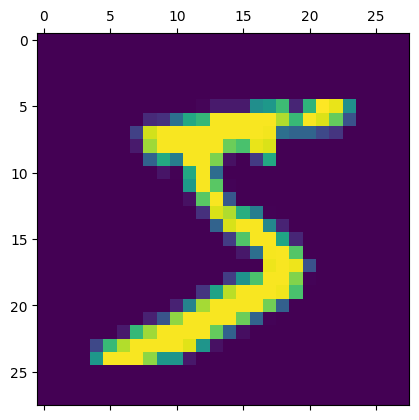

In [12]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [18]:
x_train_flat = x_train.reshape(len(x_train), len(x_train[1])*len(x_train[1]))
x_test_flat = x_test.reshape(len(x_test), len(x_test[1])*len(x_test[1]))

In [26]:
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

In [19]:
x_test_flat.shape

(10000, 784)

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100 ,input_shape = (784,) , activation = 'tanh'),
    keras.layers.Dense(10 , activation = 'sigmoid')]
)

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [49]:
model.fit(x_train_flat , y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2874 - accuracy: 0.9182
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1428 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0990 - accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0451 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [50]:
model.evaluate( x_test_flat , y_test )

313/313 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9758


[0.08013005554676056, 0.9757999777793884]

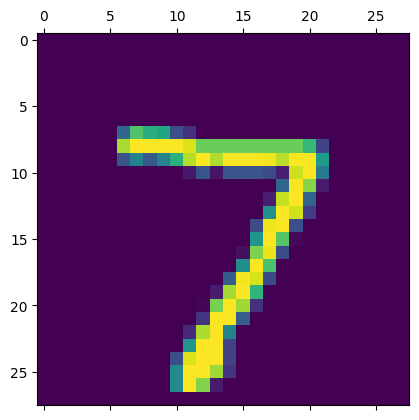

In [51]:
plt.matshow(x_test[0])

In [52]:
y_pred = model.predict(x_test_flat)

313/313 [==============================] - 0s 1ms/step


In [53]:
y_pred[0]

array([1.0410789e-02, 4.7824782e-05, 1.5474978e-01, 9.9782801e-01,
       3.5113635e-04, 5.9227282e-01, 4.3207034e-04, 9.9999917e-01,
       7.4638307e-01, 8.0871099e-01], dtype=float32)

In [54]:
pred = [ np.argmax(i) for i in y_pred ]
pred[:5]

[7, 2, 1, 0, 4]

In [55]:
cm = tf.math.confusion_matrix( labels = y_test , predictions = pred )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    1,    3,    5,    1,    4,    0],
       [   0, 1125,    4,    1,    0,    1,    1,    0,    3,    0],
       [   5,    1,  997,    3,    2,    0,    2,   10,   12,    0],
       [   0,    0,    5,  982,    1,   11,    0,    5,    5,    1],
       [   1,    0,    1,    1,  965,    0,    8,    3,    2,    1],
       [   2,    0,    0,    4,    1,  872,    4,    1,    7,    1],
       [   3,    2,    0,    0,    3,    5,  942,    0,    3,    0],
       [   1,    4,   10,    3,    2,    1,    0,  995,    3,    9],
       [   1,    0,    2,    3,    3,    3,    1,    5,  953,    3],
       [   2,    4,    1,    8,   14,    6,    0,    7,    4,  963]],
      dtype=int32)>

<Axes: >

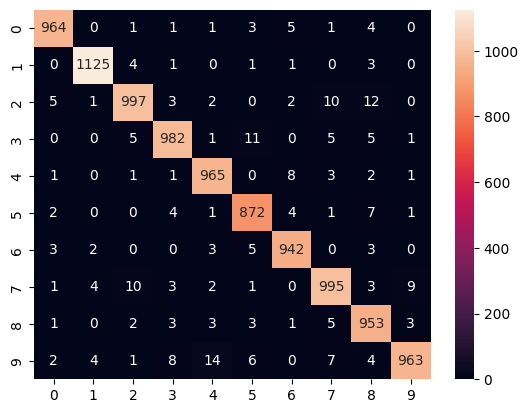

In [56]:
import seaborn as sns
sns.heatmap(cm , annot = True , fmt = 'd')
